In [1]:
import os

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## EDA


In [3]:
df.shape

(381109, 12)

In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

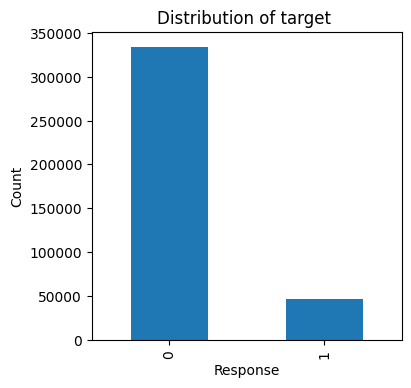

In [8]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(4,4))

value_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title("Distribution of target ")
plt.show()


<Axes: >

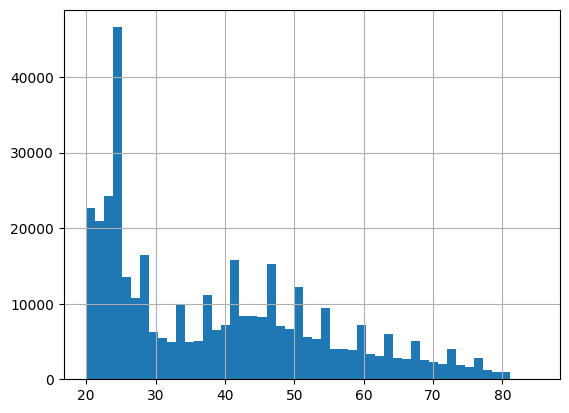

In [9]:
df['Age'].hist(bins=50)

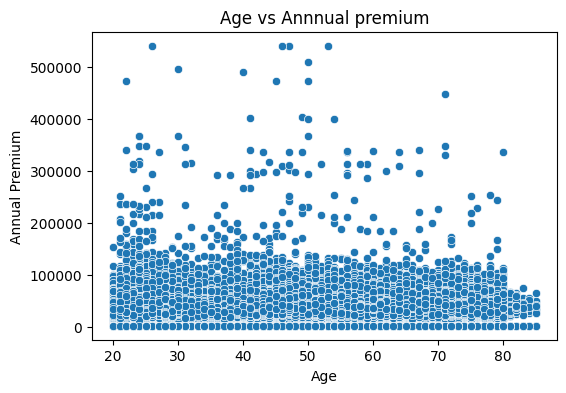

In [10]:
# Age vs Annnual premium
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='Age',y='Annual_Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.title('Age vs Annnual premium')
plt.show()

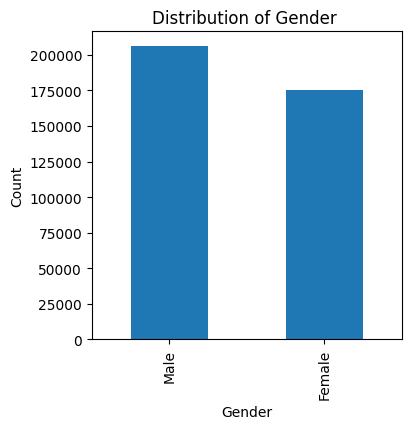

In [11]:
# Gender Response comparision

value_counts =df['Gender'].value_counts()
plt.figure(figsize=(4,4))

value_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Distribution of Gender ")
plt.show()

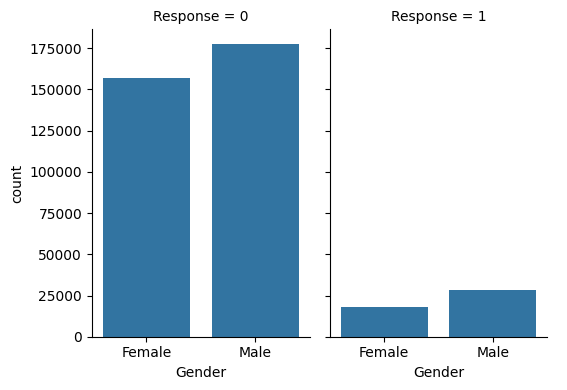

In [12]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

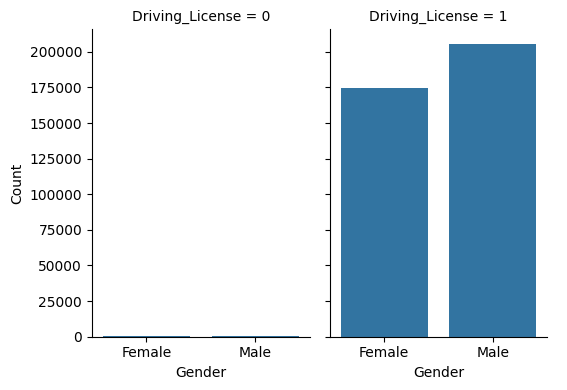

In [13]:
data = df.groupby(['Gender','Driving_License'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()
g=sns.catplot(data=data,x='Gender',y='Count',col='Driving_License',kind='bar',height=4,aspect=.7);


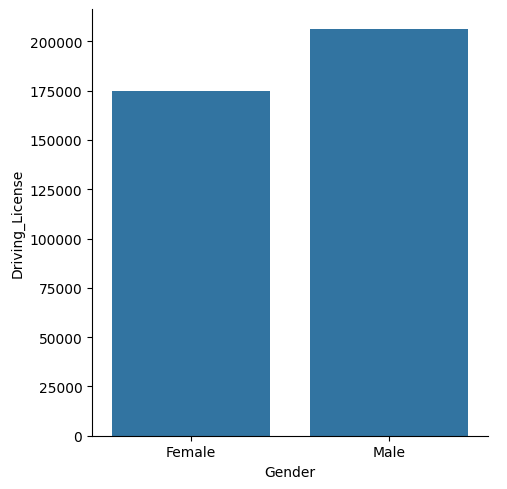

In [14]:
# Based on above results
data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
g=sns.catplot(data=data,x='Gender',y='Driving_License',kind='bar');

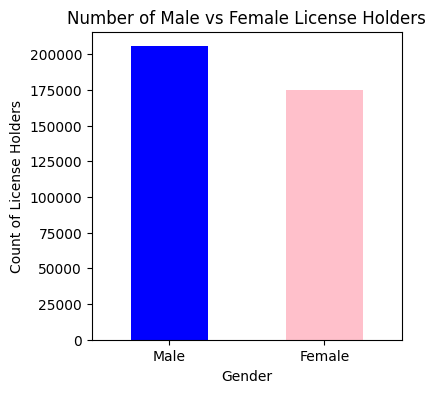

In [15]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

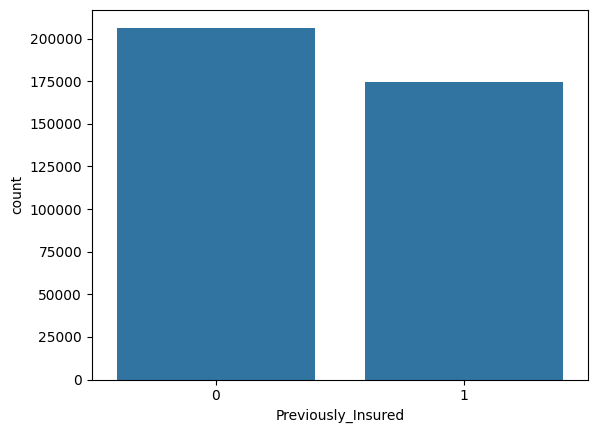

In [16]:
sns.countplot(data=df,x='Previously_Insured');


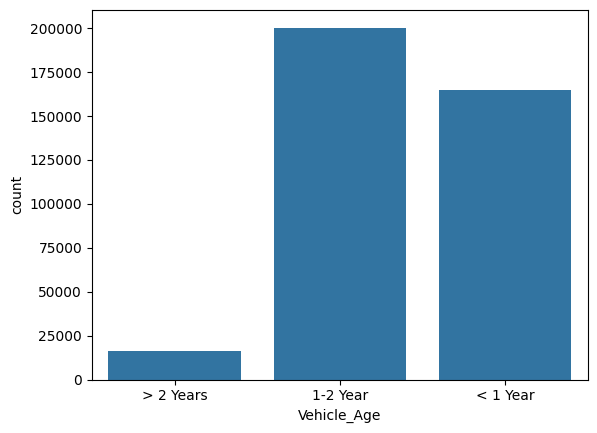

In [17]:
sns.countplot(data=df,x='Vehicle_Age');

In [18]:
#Response vs Vehicle Age
data= df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()
data

,Vehicle_Age,Response,Count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


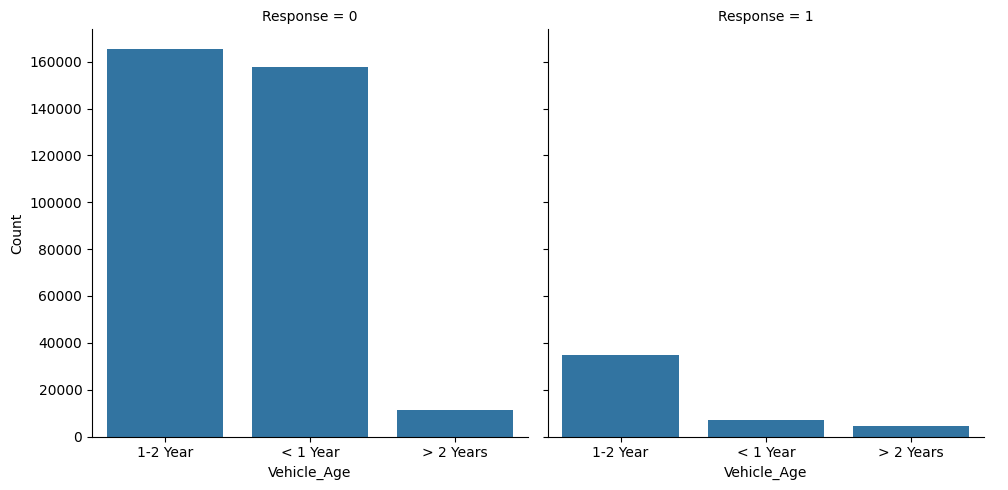

In [19]:
g=sns.catplot(data=data,x='Vehicle_Age',y='Count',kind='bar',col='Response');

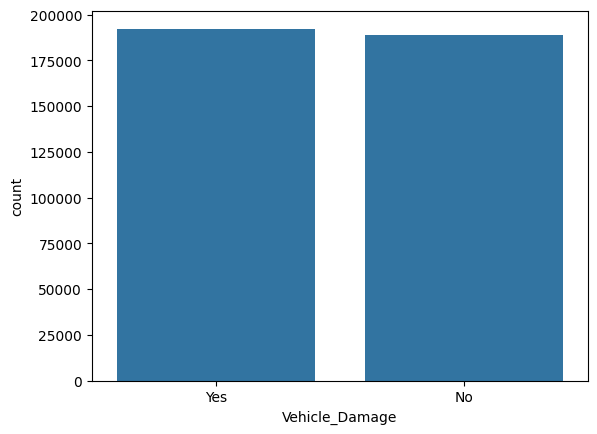

In [20]:
g=sns.countplot(data=df,x='Vehicle_Damage');#Dist of vehicle damage

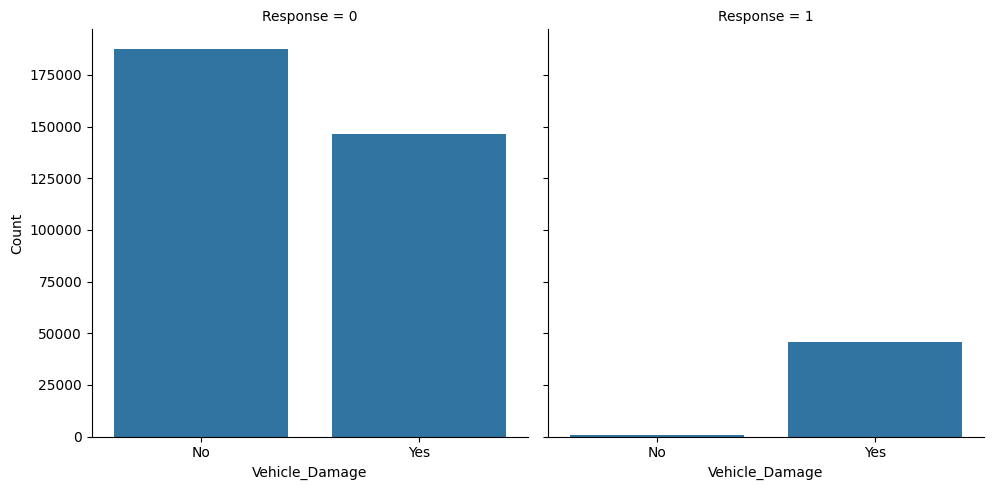

In [21]:
data= df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()
g=sns.catplot(data=data,x='Vehicle_Damage',y='Count',kind='bar',col='Response');

In [22]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

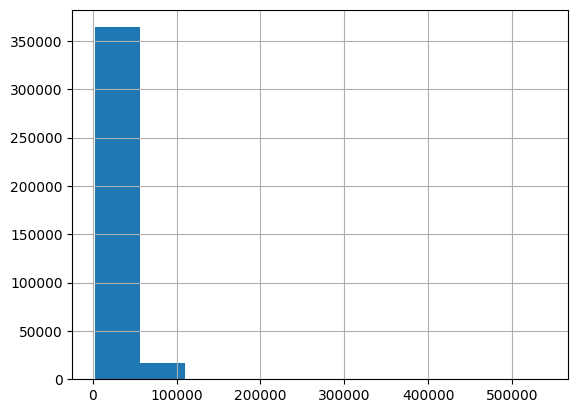

In [23]:

df['Annual_Premium'].hist(bins=10)

## Data preprocessing

In [24]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [26]:
num_features=['Age','Vintage']
categorical_features=['Gender','Driving_License','Previously_Insured','Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [27]:
#Gender is easily mapped as below
df['Gender']=df['Gender'].map({'Female':0,'Male':1}).astype(int)
df['Gender']

0         1
1         1
2         1
3         1
4         0
         ..
381104    1
381105    1
381106    1
381107    0
381108    1
Name: Gender, Length: 381109, dtype: int64

In [28]:
df['Gender']

0         1
1         1
2         1
3         1
4         0
         ..
381104    1
381105    1
381106    1
381107    0
381108    1
Name: Gender, Length: 381109, dtype: int64

In [29]:
#Get dummies for other cAtegorical features
df=pd.get_dummies(data=df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [30]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [31]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in categorical_features:
    df[column] = df[column].astype('str')

In [32]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [33]:
## Scaling the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

ss=StandardScaler()
df[num_features]=ss.fit_transform(df[num_features])

mm=MinMaxScaler()
df['Annual_Premium']=mm.fit_transform(df[['Annual_Premium']])

#Also dropping Id column
id=df.id
df=df.drop('id',axis=1)


In [34]:
from sklearn.model_selection import train_test_split
target=df['Response']
train=df.drop(['Response'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.25,random_state=0)

## Model Train RF classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search={
    'criterion':['gini','entropy'],
    'max_depth' :[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[4,6,8],
    'min_samples_split':[5,7,10],
    'n_estimators':[100,200,300]
}

clf=RandomForestClassifier()
model=RandomizedSearchCV(estimator=clf,param_distributions=random_search,n_iter=10,
                         n_jobs=-1,cv=4,verbose=1,random_state=101)
model.fit(X=X_train,y=y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=101, verbose=1)

In [38]:
best_params=model.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 10,
 'criterion': 'gini'}

In [40]:
#Training with best model only
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=5,n_estimators=300)

clf.fit(X=X_train,y=y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=300)

In [41]:
import pickle

filename = 'rf_model.pkl'
pickle.dump(clf,open(file=filename,mode='wb'))

## MODEL EVALUATION

In [42]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

In [43]:
from sklearn.metrics import classification_report

y_pred=clf.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

